Hola Javier!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> 

Hola Patricio!

Muchas gracias por tu revisión, los consejos y las oportunidades de mejora, acabo de realizar todos las mejoras y modificaciones, quedo atento a cualquier requerimiento. Buena semana, saludos
    <a class=“tocSkip”></a>
</div>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías

import pandas as pd
import math as math
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames

calls = pd.read_csv('/datasets/megaline_calls.csv',sep = ',')
internet = pd.read_csv('/datasets/megaline_internet.csv', sep = ',')
messages = pd.read_csv('/datasets/megaline_messages.csv', sep = ',')
plans = pd.read_csv('/datasets/megaline_plans.csv', sep = ',')
users = pd.read_csv('/datasets/megaline_users.csv', sep = ',')

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo realizando la importación de librerías y carga de datos en celdas separadas, esto ayuda a que la lectura y seguimiento del notebook sea más amigable
</div>

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas

print('Muestra de información de los planes')
print()
plans


Muestra de información de los planes



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Cuando quieras mostrar el resultado que devuelve `.head()`, o `.sample()` o directamente un DataFrame como en este caso el de `plans` no es necesario el uso de `print` ya que pierdes la capacidad del notebook de mostrar el DataFrame en formato de tabla. Te recomiendo ejecutar la línea sin print o utilizar `display()` en su lugar.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b>

Aplicado<a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el ajuste
</div>

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**El DF tiene solo la información de las tarifas de los planes que ofrece la empresa, por lo cual, no existen valores
nulos ni valores duplicados, y todos los datos, lo unico seria agregar una columna con la cantidad de Gb's incluidos en el plan**

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

**No hay nada que corregir**

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [5]:
# Se agrega columna con los gb's incluidos en el plan mensual

plans['gb_per_month_included'] = (plans['mb_per_month_included']/1024).astype('int')
plans = plans[['plan_name','minutes_included','messages_included','mb_per_month_included','gb_per_month_included','usd_monthly_pay','usd_per_minute','usd_per_message','usd_per_gb']]
plans

,plan_name,minutes_included,messages_included,mb_per_month_included,gb_per_month_included,usd_monthly_pay,usd_per_minute,usd_per_message,usd_per_gb
0,surf,500,50,15360,15,20,0.03,0.03,10
1,ultimate,3000,1000,30720,30,70,0.01,0.01,7


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con la transformación!
</div>

## Usuarios/as

In [6]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Imprime una muestra de datos para usuarios

users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
100,1100,Aaron,Rowe,65,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-13,surf,NaN
369,1369,Bernard,Mckee,69,"Milwaukee-Waukesha, WI MSA",2018-10-06,surf,NaN
451,1451,Lenard,Harding,53,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-02-15,ultimate,2018-12-10
215,1215,Adelle,Knapp,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-01,surf,NaN


In [8]:
users.duplicated().sum()

0

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**El DF tiene solo 1 columna con valores nulos, los cuales corresponden a los clientes que aun mantienen contrato del plan vigente con la empresa, no existen valores duplicados, ademas de ello, las columnas que contienen fechas, tienen su tipo de dato esta erroneo, por lo que modificarlo nos permite trabajar mejor con las fechas, y separar en columnas dia, mes y año respectivamente, luego con la columna edad generar una columna categorica que permita trabajar con rangos de edad, y por ultimo la columna city, separar la informacion en 2 columnas, ciudades y estados**

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [9]:
# CAMBIANDO EL TIPO DE DATOS DE LAS COLUMNAS QUE SE COMPONEN DE FECHAS, DE OBJECT(STRING) A DATETIME

users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [10]:
# REVISION DE DATOS PARA CREAR COLUMNA CATEGORICA DE RANGO HETARIO DE LOS CLIENTES, A TRAVES DE COLUMNA AGE

print('Metodo describe() para obtener la edad minima y maxima de los clientes')
print()
print(users.age.describe())
print()
print()
print('Metodo value_counts() para obtener la frecuencia de distribucion de las edades')
print()
print(users.age.value_counts())

Metodo describe() para obtener la edad minima y maxima de los clientes

count    500.000000
mean      45.486000
std       16.972269
min       18.000000
25%       30.000000
50%       46.000000
75%       61.000000
max       75.000000
Name: age, dtype: float64


Metodo value_counts() para obtener la frecuencia de distribucion de las edades

18    15
70    14
69    14
61    14
27    14
20    13
28    13
33    12
30    12
67    11
65    11
52    11
51    11
39    11
47    11
75    10
49    10
36    10
64    10
34    10
53    10
42    10
26    10
45    10
46    10
29    10
60     9
56     9
23     9
66     9
59     8
19     8
44     8
21     8
48     7
41     7
22     7
57     7
38     7
25     7
63     6
24     6
71     6
74     6
54     6
55     6
50     6
40     6
31     6
37     6
35     6
58     5
73     5
62     4
72     4
32     4
43     3
68     2
Name: age, dtype: int64


In [11]:
# CREANDO FUNCION DE RANGO HETARIO PARA APLICAR A COLUMNA AGE

def age_range(age):
    
    if age <= 25:
        return 'young'
    elif age <= 50:
        return 'adult'
    elif age > 50:
        return 'senior'
    else:
        return 'unknown'

In [12]:
# APLICANDO FUNCION A LA COLUMNA AGE DEL DF

users['age_range'] = users.age.apply(age_range)
users.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,age_range
24,1024,Yuki,Tyson,74,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-21,surf,NaT,senior
357,1357,Ria,Beach,61,"Baton Rouge, LA MSA",2018-05-30,surf,NaT,senior
409,1409,Elvis,Vargas,38,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-10-04,ultimate,NaT,adult
353,1353,Emerson,Whitfield,56,"North Port-Sarasota-Bradenton, FL MSA",2018-03-27,surf,NaT,senior
173,1173,Tristan,Cain,27,"Oxnard-Thousand Oaks-Ventura, CA MSA",2018-09-28,surf,NaT,adult
277,1277,Andrew,Faulkner,25,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-02,surf,NaT,young
407,1407,Tristan,Daugherty,27,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-29,ultimate,NaT,adult
241,1241,Lala,Walls,24,"Richmond, VA MSA",2018-08-27,surf,NaT,young
21,1021,Ricarda,Booker,37,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-21,surf,NaT,adult
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaT,adult


In [13]:
# GENERANDO COLUMNAS DE DIA, MES Y AÑO DE REGISTRO Y TERMINO DEL PLAN

users['day_reg'] = users['reg_date'].dt.day
users['month_reg'] = users['reg_date'].dt.month
users['year_reg'] = users['reg_date'].dt.year
users['day_churn'] = users['churn_date'].dt.day
users['month_churn'] = users['churn_date'].dt.month
users['year_churn'] = users['churn_date'].dt.year
users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,age_range,day_reg,month_reg,year_reg,day_churn,month_churn,year_churn
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,adult,24,12,2018,NaN,NaN,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,adult,13,8,2018,NaN,NaN,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,adult,21,10,2018,NaN,NaN,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,senior,28,1,2018,NaN,NaN,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,adult,23,5,2018,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT,senior,4,9,2018,NaN,NaN,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT,adult,20,2,2018,NaN,NaN,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT,adult,10,12,2018,NaN,NaN,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT,senior,4,2,2018,NaN,NaN,NaN


In [14]:
# GENERANDO COLUMNAS DE CIUDADES Y ESTADOS  

cities = users['city'].str.split(',',expand=True)
cities.columns = ['cities','state']
users = pd.concat([users, cities], axis = 1)
users.drop('city',axis = 1,inplace = True)

In [15]:
# ORDENANDO COLUMNAS DEL DF USERS

users = users[['user_id','first_name','last_name','age','age_range','cities','state','reg_date','day_reg','month_reg','year_reg','churn_date','day_churn','month_churn','year_churn','plan']]
users

,user_id,first_name,last_name,age,age_range,cities,state,reg_date,day_reg,month_reg,year_reg,churn_date,day_churn,month_churn,year_churn,plan
0,1000,Anamaria,Bauer,45,adult,Atlanta-Sandy Springs-Roswell,GA MSA,2018-12-24,24,12,2018,NaT,NaN,NaN,NaN,ultimate
1,1001,Mickey,Wilkerson,28,adult,Seattle-Tacoma-Bellevue,WA MSA,2018-08-13,13,8,2018,NaT,NaN,NaN,NaN,surf
2,1002,Carlee,Hoffman,36,adult,Las Vegas-Henderson-Paradise,NV MSA,2018-10-21,21,10,2018,NaT,NaN,NaN,NaN,surf
3,1003,Reynaldo,Jenkins,52,senior,Tulsa,OK MSA,2018-01-28,28,1,2018,NaT,NaN,NaN,NaN,surf
4,1004,Leonila,Thompson,40,adult,Seattle-Tacoma-Bellevue,WA MSA,2018-05-23,23,5,2018,NaT,NaN,NaN,NaN,surf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,senior,New York-Newark-Jersey City,NY-NJ-PA MSA,2018-09-04,4,9,2018,NaT,NaN,NaN,NaN,surf
496,1496,Ariel,Shepherd,49,adult,New Orleans-Metairie,LA MSA,2018-02-20,20,2,2018,NaT,NaN,NaN,NaN,surf
497,1497,Donte,Barrera,49,adult,Los Angeles-Long Beach-Anaheim,CA MSA,2018-12-10,10,12,2018,NaT,NaN,NaN,NaN,ultimate
498,1498,Scot,Williamson,51,senior,New York-Newark-Jersey City,NY-NJ-PA MSA,2018-02-04,4,2,2018,NaT,NaN,NaN,NaN,surf


## Llamadas

In [16]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [17]:
# Imprime una muestra de datos para las llamadas

calls.sample(5)

,id,user_id,call_date,duration
91974,1329_1595,1329,2018-10-27,5.70
18952,1072_428,1072,2018-08-03,9.96
131516,1472_557,1472,2018-04-27,13.19
77830,1278_195,1278,2018-12-13,17.15
36480,1138_441,1138,2018-03-06,19.48


In [18]:
calls.duplicated().sum()

0

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**El DF no tiene valores nulos y tampoco valores duplicados, a corregir la columna 'call_date', ya que su tipo de dato es erroneo, de object pasar a datetime, y con ello agregar al DF las columnas adicionales de dia, mes y año**

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [19]:
# CAMBIANDO EL TIPO DE DATOS DE LA COLUMNA QUE SE COMPONE DE FECHAS, DE OBJECT(STRING) A DATETIME

calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [20]:
# GENERANDO COLUMNAS DE DIA, MES Y AÑO DE LAS LLAMADAS

calls['day'] = calls['call_date'].dt.day
calls['month'] = calls['call_date'].dt.month
calls['year'] = calls['call_date'].dt.year

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

La descripción del proyecto menciona que se cobrará los minutos completos así sea que el usario consumió 1.1 minutos, por lo que te recomendaría aplicar un redondeo hacia arriba utilizando `np.ceil`
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> 
    
Agregado <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo haciendo el cambio
</div>

In [21]:
calls['duration'] = calls['duration'].apply(np.ceil)
calls

,id,user_id,call_date,duration,day,month,year
0,1000_93,1000,2018-12-27,9.0,27,12,2018
1,1000_145,1000,2018-12-27,14.0,27,12,2018
2,1000_247,1000,2018-12-27,15.0,27,12,2018
3,1000_309,1000,2018-12-28,6.0,28,12,2018
4,1000_380,1000,2018-12-30,5.0,30,12,2018
...,...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,9.0,21,11,2018
137731,1499_200,1499,2018-10-20,11.0,20,10,2018
137732,1499_201,1499,2018-09-21,9.0,21,9,2018
137733,1499_202,1499,2018-10-10,1.0,10,10,2018


## Mensajes

In [22]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [23]:
# Imprime una muestra de datos para los mensajes

messages.sample(5)

,id,user_id,message_date
73910,1475_44,1475,2018-08-18
70662,1460_143,1460,2018-09-14
10159,1076_364,1076,2018-10-10
36096,1237_117,1237,2018-10-26
12009,1080_12,1080,2018-12-27


In [24]:
messages.duplicated().sum()

0

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**El DF no tiene valores nulos y tampoco valores duplicados, a corregir la columna 'message_date', ya que su tipo de dato es erroneo, de object pasar a datetime, y con ello agregar al DF las columnas adicionales de dia, mes y año**

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [25]:
# CAMBIANDO EL TIPO DE DATOS DE LA COLUMNA QUE SE COMPONE DE FECHAS, DE OBJECT(STRING) A DATETIME

messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [26]:
# GENERANDO COLUMNAS DE DIA, MES Y AÑO DE LOS MENSAJES

messages['day'] = messages['message_date'].dt.day
messages['month'] = messages['message_date'].dt.month
messages['year'] = messages['message_date'].dt.year

## Internet

In [27]:
# Imprime la información general/resumida sobre el DataFrame de internet

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [28]:
# Imprime una muestra de datos para el tráfico de internet

internet.sample(5)

,id,user_id,session_date,mb_used
77706,1362_389,1362,2018-11-22,619.93
53655,1242_66,1242,2018-10-11,121.52
55398,1251_209,1251,2018-03-22,880.72
33183,1150_173,1150,2018-11-20,0.00
33537,1152_167,1152,2018-11-10,354.59


In [29]:
internet.duplicated().sum()

0

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**El DF no tiene valores nulos y tampoco valores duplicados, a corregir la columna 'session_date', ya que su tipo de dato es erroneo, de object pasar a datetime, y con ello agregar al DF las columnas adicionales de dia, mes y año** 

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [30]:
# CAMBIANDO EL TIPO DE DATOS DE LA COLUMNA QUE SE COMPONE DE FECHAS, DE OBJECT(STRING) A DATETIME

internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [31]:
# GENERANDO COLUMNAS DE DIA, MES Y AÑO DEL USO DE DATOS

internet['day'] = internet['session_date'].dt.day
internet['month'] = internet['session_date'].dt.month
internet['year'] = internet['session_date'].dt.year

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Cómo los datos de los planes están en gb_per_usd te recomendaría hacer la transformación a GB de la columna mb_used y una vez transformado también aplicar un redondeo hacia arriba con `np.ceil` ya que el caso es similar con `duration`
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> 
    
Corregido 
    <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Perfecto! Buen trabajo haciendo el cambio
</div>

In [32]:
agg_internet = {'mb_used':'sum'}
internet_per_user_per_month = internet.groupby(['user_id','month']).agg(agg_internet)
internet_per_user_per_month['gb_used'] = (internet_per_user_per_month['mb_used']/1024).apply(np.ceil).astype('int')
internet_per_user_per_month.reset_index(inplace = True)
internet_per_user_per_month

,user_id,month,mb_used,gb_used
0,1000,12,1901.47,2
1,1001,8,6919.15,7
2,1001,9,13314.82,14
3,1001,10,22330.49,22
4,1001,11,18504.30,19
...,...,...,...,...
2272,1498,12,23137.69,23
2273,1499,9,12984.76,13
2274,1499,10,19492.43,20
2275,1499,11,16813.83,17


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [33]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

plans

,plan_name,minutes_included,messages_included,mb_per_month_included,gb_per_month_included,usd_monthly_pay,usd_per_minute,usd_per_message,usd_per_gb
0,surf,500,50,15360,15,20,0.03,0.03,10
1,ultimate,3000,1000,30720,30,70,0.01,0.01,7


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [34]:
# REDONDEANDO TODAS LAS LLAMADAS INDIVIDUALES DE LA VARIABLE DURATION AL MINUTO SIGUIENTE

# Calculo colocado en seccion enriquecer datos

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Te había puesto un comentario justo sobre esta parte, te recomiendo que para mantener el orden del notebook con respecto a lo que dice cada título muevas esta sección a la parte de enriquecer datos para el dataset de llamadas
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b>

Corregido
    <a class=“tocSkip”></a>
</div>

In [35]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

agg_calls = {'id':'count','duration':'sum'}
calls_per_user_per_month = calls.groupby(['user_id','month']).agg(agg_calls)
calls_per_user_per_month.rename(columns = {'id':'number_calls'}, inplace = True)
calls_per_user_per_month.reset_index(inplace = True)
calls_per_user_per_month

,user_id,month,number_calls,duration
0,1000,12,16,124.0
1,1001,8,27,182.0
2,1001,9,49,315.0
3,1001,10,65,393.0
4,1001,11,64,426.0
...,...,...,...,...
2253,1498,12,39,339.0
2254,1499,9,41,346.0
2255,1499,10,53,385.0
2256,1499,11,45,308.0


In [36]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

# El calculo esta realizado en la celda anterior

In [37]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

agg_message = {'id':'count'}
messages_per_user_per_month = messages.groupby(['user_id','month']).agg(agg_message)
messages_per_user_per_month.rename(columns = {'id':'number_messages'},inplace = True)
messages_per_user_per_month.reset_index(inplace = True)
messages_per_user_per_month

,user_id,month,number_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [38]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

# Calculo colocado en seccion enriquecer datos

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto! Lo hiciste muy bien, al igual que con el proceso de duration te dejé un comentario antes recomendando esta transformación ya que debería estar en la seccion de enriquecer datos para el dataset de `internet`
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b>

Corregido
    <a class=“tocSkip”></a>
</div>

[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [39]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

megaline_2018 = (calls_per_user_per_month.merge(messages_per_user_per_month, on = ['user_id','month'], how = 'outer')
                                         .merge(internet_per_user_per_month, on = ['user_id','month'], how = 'outer')
                )

megaline_2018.fillna(0, inplace = True)
print()
print('Se reemplazan valores ausentes por 0, ya que los NaN generados en el DF corresponde al tipo de merge usado, por ende en esos datos no hay registros, ya que el cliente no hay usado el servicio, y por ello, se reemplaza por 0')


megaline_2018


Se reemplazan valores ausentes por 0, ya que los NaN generados en el DF corresponde al tipo de merge usado, por ende en esos datos no hay registros, ya que el cliente no hay usado el servicio, y por ello, se reemplaza por 0


,user_id,month,number_calls,duration,number_messages,mb_used,gb_used
0,1000,12,16.0,124.0,11.0,1901.47,2.0
1,1001,8,27.0,182.0,30.0,6919.15,7.0
2,1001,9,49.0,315.0,44.0,13314.82,14.0
3,1001,10,65.0,393.0,53.0,22330.49,22.0
4,1001,11,64.0,426.0,36.0,18504.30,19.0
...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13039.91,13.0
2289,1361,5,0.0,0.0,2.0,1519.69,2.0
2290,1482,10,0.0,0.0,2.0,0.00,0.0
2291,1108,12,0.0,0.0,0.0,233.17,1.0


In [40]:
# Añade la información de la tarifa

print('Uniendo informacion de los usuarios con sus respectivos planes y tarifas')

merge_users_plans = users.merge(plans,how='inner', left_on = 'plan', right_on = 'plan_name').drop('plan_name',axis=1)
merge_users_plans

Uniendo informacion de los usuarios con sus respectivos planes y tarifas


,user_id,first_name,last_name,age,age_range,cities,state,reg_date,day_reg,month_reg,...,year_churn,plan,minutes_included,messages_included,mb_per_month_included,gb_per_month_included,usd_monthly_pay,usd_per_minute,usd_per_message,usd_per_gb
0,1000,Anamaria,Bauer,45,adult,Atlanta-Sandy Springs-Roswell,GA MSA,2018-12-24,24,12,...,NaN,ultimate,3000,1000,30720,30,70,0.01,0.01,7
1,1006,Jesusa,Bradford,73,senior,San Francisco-Oakland-Berkeley,CA MSA,2018-11-27,27,11,...,2018.0,ultimate,3000,1000,30720,30,70,0.01,0.01,7
2,1008,Emely,Hoffman,53,senior,Orlando-Kissimmee-Sanford,FL MSA,2018-08-03,3,8,...,NaN,ultimate,3000,1000,30720,30,70,0.01,0.01,7
3,1011,Halina,Henry,73,senior,Cleveland-Elyria,OH MSA,2018-01-18,18,1,...,NaN,ultimate,3000,1000,30720,30,70,0.01,0.01,7
4,1013,Nicolas,Snider,50,adult,Knoxville,TN MSA,2018-12-01,1,12,...,NaN,ultimate,3000,1000,30720,30,70,0.01,0.01,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1494,Preston,Downs,70,senior,New York-Newark-Jersey City,NY-NJ-PA MSA,2018-04-19,19,4,...,NaN,surf,500,50,15360,15,20,0.03,0.03,10
496,1495,Fidel,Sharpe,67,senior,New York-Newark-Jersey City,NY-NJ-PA MSA,2018-09-04,4,9,...,NaN,surf,500,50,15360,15,20,0.03,0.03,10
497,1496,Ariel,Shepherd,49,adult,New Orleans-Metairie,LA MSA,2018-02-20,20,2,...,NaN,surf,500,50,15360,15,20,0.03,0.03,10
498,1498,Scot,Williamson,51,senior,New York-Newark-Jersey City,NY-NJ-PA MSA,2018-02-04,4,2,...,NaN,surf,500,50,15360,15,20,0.03,0.03,10


In [41]:
# Añadiendo la informacion de los usuarios y sus planes al df de los servicios

megaline_2018 = pd.merge(megaline_2018,merge_users_plans,how='inner',on='user_id')
megaline_2018

,user_id,month,number_calls,duration,number_messages,mb_used,gb_used,first_name,last_name,age,...,year_churn,plan,minutes_included,messages_included,mb_per_month_included,gb_per_month_included,usd_monthly_pay,usd_per_minute,usd_per_message,usd_per_gb
0,1000,12,16.0,124.0,11.0,1901.47,2.0,Anamaria,Bauer,45,...,NaN,ultimate,3000,1000,30720,30,70,0.01,0.01,7
1,1001,8,27.0,182.0,30.0,6919.15,7.0,Mickey,Wilkerson,28,...,NaN,surf,500,50,15360,15,20,0.03,0.03,10
2,1001,9,49.0,315.0,44.0,13314.82,14.0,Mickey,Wilkerson,28,...,NaN,surf,500,50,15360,15,20,0.03,0.03,10
3,1001,10,65.0,393.0,53.0,22330.49,22.0,Mickey,Wilkerson,28,...,NaN,surf,500,50,15360,15,20,0.03,0.03,10
4,1001,11,64.0,426.0,36.0,18504.30,19.0,Mickey,Wilkerson,28,...,NaN,surf,500,50,15360,15,20,0.03,0.03,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1204,12,0.0,0.0,78.0,36730.05,36.0,Sherly,Levy,44,...,NaN,ultimate,3000,1000,30720,30,70,0.01,0.01,7
2289,1349,10,0.0,0.0,76.0,13093.55,13.0,Florentina,Diaz,69,...,NaN,surf,500,50,15360,15,20,0.03,0.03,10
2290,1349,11,0.0,0.0,72.0,17128.26,17.0,Florentina,Diaz,69,...,NaN,surf,500,50,15360,15,20,0.03,0.03,10
2291,1349,12,0.0,0.0,61.0,13039.91,13.0,Florentina,Diaz,69,...,NaN,surf,500,50,15360,15,20,0.03,0.03,10


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con la agregación de los datos!
</div>

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [42]:
# Calcula el ingreso mensual para cada usuario

def monthly_income(row):

  duration = row['duration']
  number_messages = row['number_messages']
  gb_used = row['gb_used']
  minutes_included = row['minutes_included']
  messages_included = row['messages_included']
  gb_per_month_included = row['gb_per_month_included']
  usd_monthly_pay = row['usd_monthly_pay']
  usd_per_minute = row['usd_per_minute']
  usd_per_message = row['usd_per_message']
  usd_per_gb = row['usd_per_gb']
  

  if duration <= minutes_included:
    if number_messages <= messages_included:
      if gb_used <= gb_per_month_included:
        return usd_monthly_pay
      else:
        excess_gb = gb_used - gb_per_month_included
        pay_excess_gb = excess_gb * usd_per_gb
        total_pay_excess_gb = pay_excess_gb + usd_monthly_pay
        return total_pay_excess_gb
    else: 
      excess_messages = number_messages - messages_included 
      pay_excess_messages = excess_messages * usd_per_message
      if gb_used <= gb_per_month_included:
        total_pay_excess_messages = pay_excess_messages + usd_monthly_pay
        return total_pay_excess_messages
      else:
        excess_gb = gb_used - gb_per_month_included
        pay_excess_gb = excess_gb * usd_per_gb
        total_pay_excess_gb_messages = pay_excess_messages + pay_excess_gb + usd_monthly_pay
        return total_pay_excess_gb_messages
  else:
    excees_minutes = duration - minutes_included
    pay_excess_minutes = excees_minutes * usd_per_minute
    if number_messages <= messages_included:
      if gb_used <= gb_per_month_included:
        total_pay_excess_minutes = pay_excess_minutes + usd_monthly_pay 
        return total_pay_excess_minutes
      else:
        excess_gb = gb_used - gb_per_month_included
        pay_excess_gb = excess_gb * usd_per_gb
        total_pay_excess_gb_minutes = pay_excess_gb + pay_excess_minutes + usd_monthly_pay
        return total_pay_excess_gb_minutes
    else: 
      excess_messages = number_messages - messages_included
      pay_excess_messages = excess_messages * usd_per_message
      if gb_used <= gb_per_month_included:
        total_pay_excess_messages_minutes = pay_excess_messages + pay_excess_minutes + usd_monthly_pay
        return total_pay_excess_messages_minutes
      else:
        excess_gb = gb_used - gb_per_month_included
        pay_excess_gb = excess_gb * usd_per_gb
        total_pay_excess_gb_messages_minutes = pay_excess_messages + pay_excess_gb + pay_excess_minutes + usd_monthly_pay
        return total_pay_excess_gb_messages_minutes

In [43]:
megaline_2018['monthly_income'] = megaline_2018.apply(monthly_income, axis = 1)
megaline_2018[['user_id','month','first_name','last_name','plan','duration','number_messages','gb_used','monthly_income']]

,user_id,month,first_name,last_name,plan,duration,number_messages,gb_used,monthly_income
0,1000,12,Anamaria,Bauer,ultimate,124.0,11.0,2.0,70.00
1,1001,8,Mickey,Wilkerson,surf,182.0,30.0,7.0,20.00
2,1001,9,Mickey,Wilkerson,surf,315.0,44.0,14.0,20.00
3,1001,10,Mickey,Wilkerson,surf,393.0,53.0,22.0,90.09
4,1001,11,Mickey,Wilkerson,surf,426.0,36.0,19.0,60.00
...,...,...,...,...,...,...,...,...,...
2288,1204,12,Sherly,Levy,ultimate,0.0,78.0,36.0,112.00
2289,1349,10,Florentina,Diaz,surf,0.0,76.0,13.0,20.78
2290,1349,11,Florentina,Diaz,surf,0.0,72.0,17.0,40.66
2291,1349,12,Florentina,Diaz,surf,0.0,61.0,13.0,20.33


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

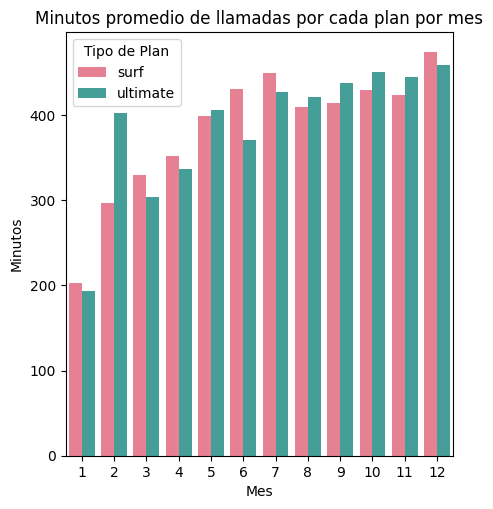

In [44]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

mega_call_bar = megaline_2018.groupby(['plan','month'])['duration'].mean().reset_index()
plt.figure(figsize=[5,5.5])
sns.barplot(data = mega_call_bar,x = 'month',y = 'duration',hue = 'plan',palette = 'husl')
plt.title('Minutos promedio de llamadas por cada plan por mes')
plt.xlabel('Mes')
plt.ylabel('Minutos')
plt.legend(loc='upper left',title='Tipo de Plan')
plt.show()


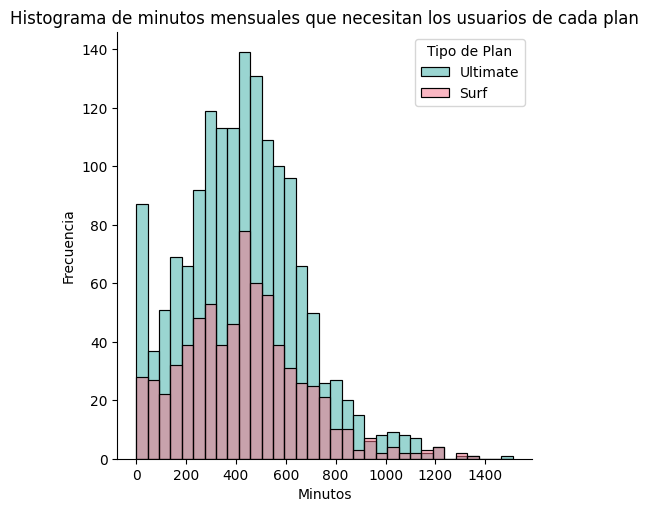

In [45]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

mega_call_hist = megaline_2018[['plan','month','duration']]
sns.displot(data = mega_call_hist,x = 'duration',kind = 'hist',hue = 'plan',palette = 'husl',legend = False)
plt.title('Histograma de minutos mensuales que necesitan los usuarios de cada plan')
plt.xlabel('Minutos')
plt.ylabel('Frecuencia')
plt.legend(title ='Tipo de Plan',loc='upper right',labels=['Ultimate','Surf'])
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [46]:
# Calcula la media y la varianza de la duración mensual de llamadas.
print('Media de la duracion mensual de las llamadas de los clientes')
print()
print(megaline_2018['duration'].mean())
print()
print('Varianza de la duración mensual de las llamadas de los clientes')
print()
print(np.var(megaline_2018['duration']))

Media de la duracion mensual de las llamadas de los clientes

429.2834714348016

Varianza de la duración mensual de las llamadas de los clientes

55822.82326365782


Text(0.5, 0, 'Plan')

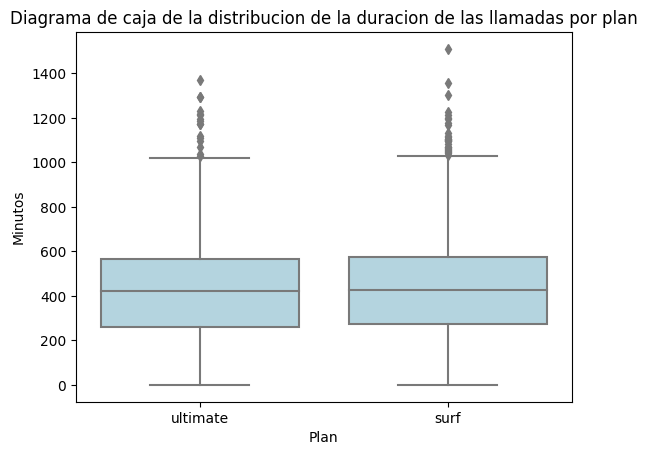

In [47]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

sns.boxplot(data=megaline_2018,x='plan',y='duration', color = 'lightblue')
plt.title('Diagrama de caja de la distribucion de la duracion de las llamadas por plan')
plt.ylabel('Minutos')
plt.xlabel('Plan')

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Lo hiciste muy bien con las visualizaciones, te recomiendo en esta última gráfica de cajas también revisarlo por mes y para cada plan
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b>

Se agrega lo solicitado
    <a class=“tocSkip”></a>
</div>

Text(0.5, 0, 'Mes')

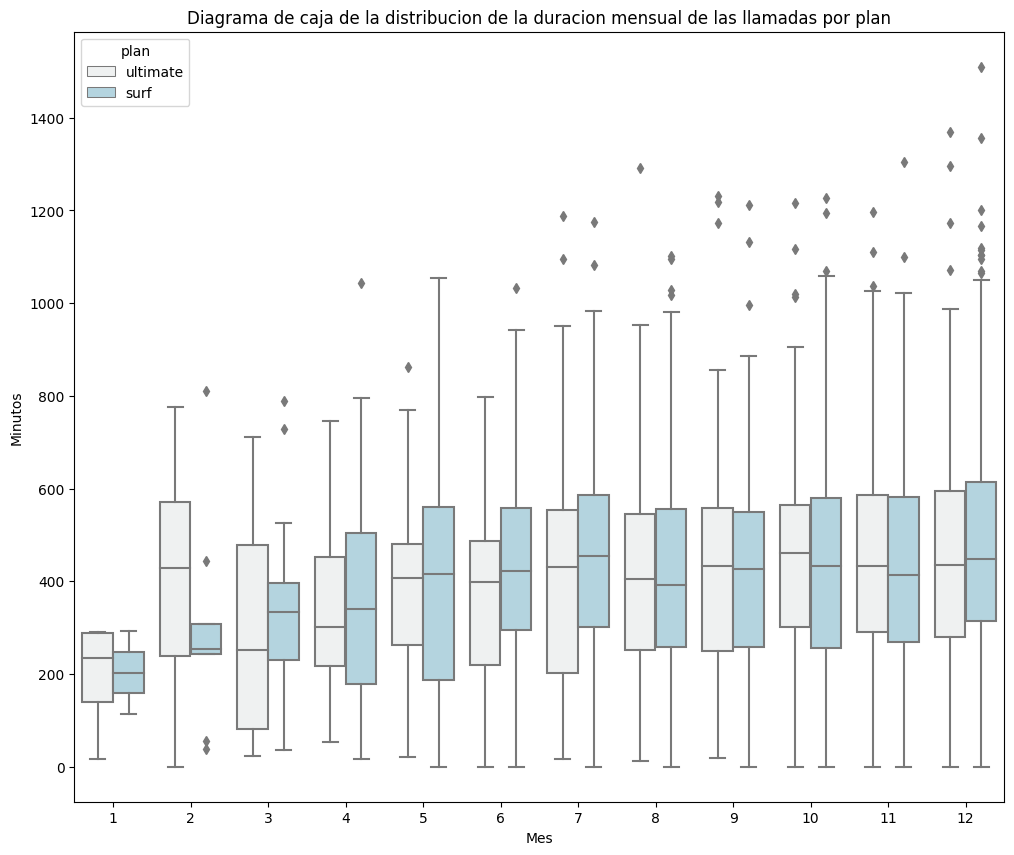

In [48]:
plt.figure(figsize=([12,10]))
sns.boxplot(data=megaline_2018,x='month',y='duration', color = 'lightblue',hue='plan')
plt.title('Diagrama de caja de la distribucion de la duracion mensual de las llamadas por plan')
plt.ylabel('Minutos')
plt.xlabel('Mes')

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

**Segun los datos presentados, los clientes tienen una media de duracion de llamada de 500 minutos mensuales aproximadamente en ambos planes, ademas existen varios clientes que no usan los minutos que tiene su plan, por ultimo existen clientes del plan surf, que se exceden ampliamente en su consumo, por lo que deberian ser contactados y ofrecer plan ultimate**

### Mensajes

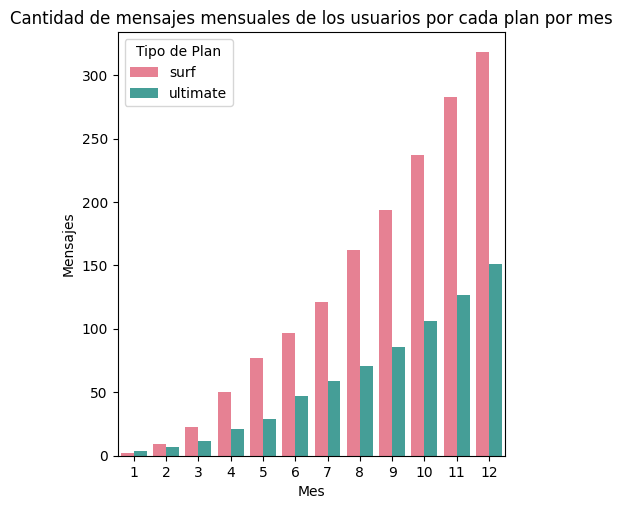

In [49]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
mega_sms_bar = megaline_2018.groupby(['plan','month'])['number_messages'].count().reset_index()
plt.figure(figsize=[5,5.5])
sns.barplot(data = mega_sms_bar,x = 'month',y = 'number_messages',hue = 'plan',palette = 'husl')
plt.title('Cantidad de mensajes mensuales de los usuarios por cada plan por mes')
plt.xlabel('Mes')
plt.ylabel('Mensajes')
plt.legend(loc='upper left',title='Tipo de Plan')
plt.show()

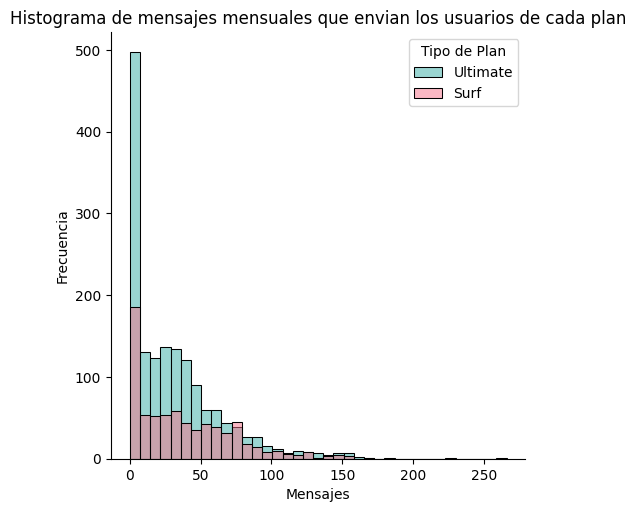

In [50]:
mega_sms_hist = megaline_2018[['plan','month','number_messages']]
sns.displot(data = mega_sms_hist,x = 'number_messages',kind = 'hist',hue = 'plan',palette = 'husl',legend = False)
plt.title('Histograma de mensajes mensuales que envian los usuarios de cada plan')
plt.xlabel('Mensajes')
plt.ylabel('Frecuencia')
plt.legend(title ='Tipo de Plan',loc='upper right',labels=['Ultimate','Surf'])
plt.show()

In [51]:
print('Media de la cantidad mensual de mensajes de los clientes')
print()
print(megaline_2018['number_messages'].mean())
print()
print('Varianza de la cantidad mensual de mensajes de los clientes')
print()
print(np.var(megaline_2018['number_messages']))

Media de la cantidad mensual de mensajes de los clientes

33.166593981683384

Varianza de la cantidad mensual de mensajes de los clientes

1160.2644400780625


Text(0.5, 0, 'Plan')

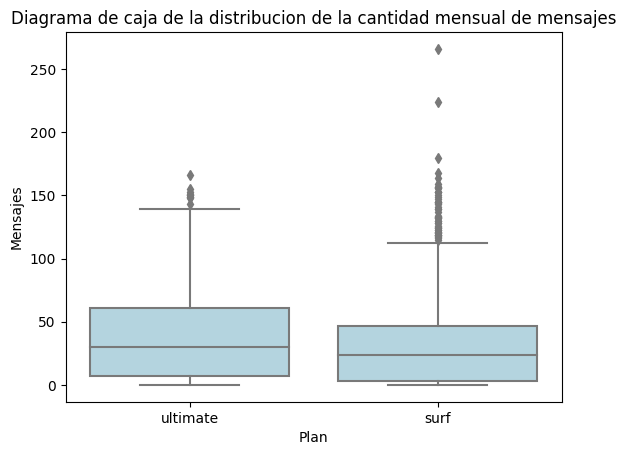

In [52]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

sns.boxplot(data=megaline_2018,x='plan',y='number_messages' ,color = 'lightblue')
plt.title('Diagrama de caja de la distribucion de la cantidad mensual de mensajes')
plt.ylabel('Mensajes')
plt.xlabel('Plan')

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b>

Se agrega por estudio estadistico
    <a class=“tocSkip”></a>
</div>

Text(0.5, 0, 'Mes')

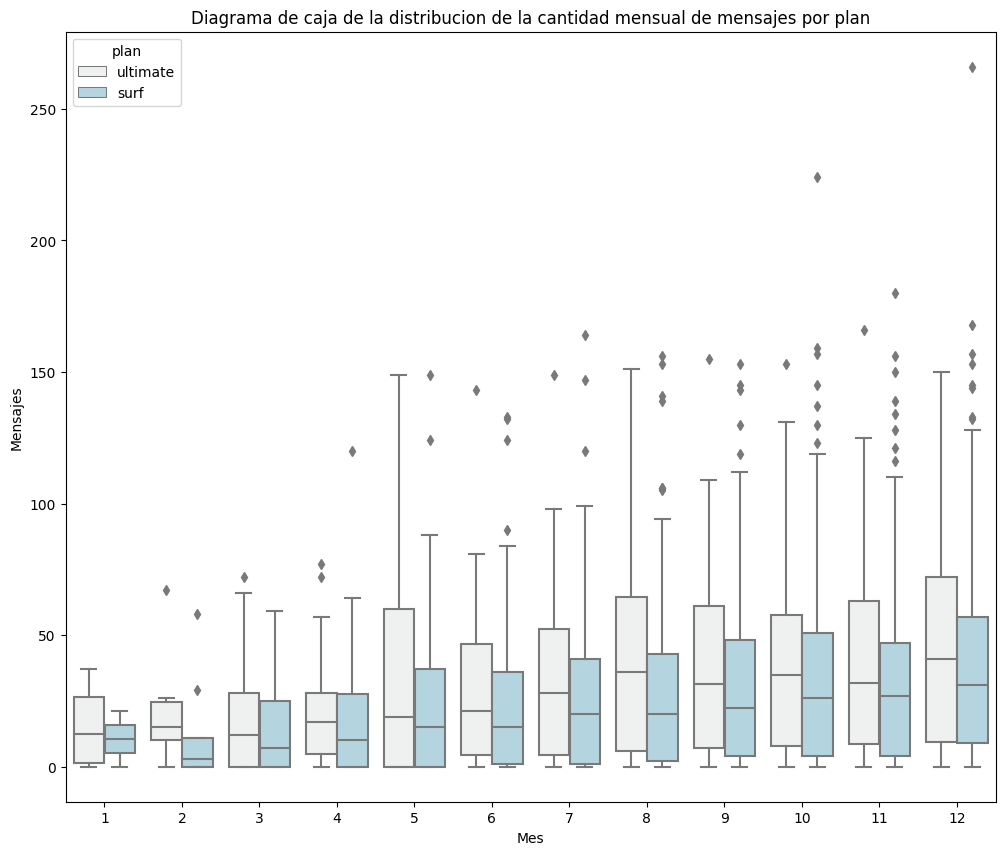

In [53]:
plt.figure(figsize=([12,10]))
sns.boxplot(data=megaline_2018,x='month',y='number_messages' ,color = 'lightblue',hue='plan')
plt.title('Diagrama de caja de la distribucion de la cantidad mensual de mensajes por plan')
plt.ylabel('Mensajes')
plt.xlabel('Mes')

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

**Segun los datos sobre mensajes, los clientes tienen una media de mensajes enviados de 35 mensuales aproximadamente en ambos planes, ademas existen varios clientes que no usan los mensajes que tiene su plan, por ultimo existen clientes del plan surf, que se exceden ampliamente en su consumo, por lo que deberian ser contactados y ofrecer plan ultimate**

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Excelente! Muy buen manejo de matplotlib para realizar las visualizaciones
</div>

### Internet

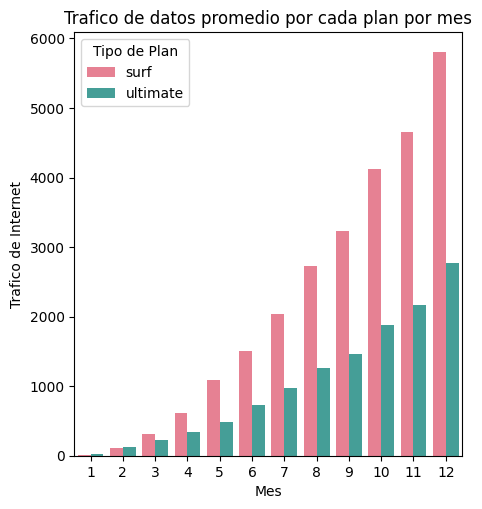

In [54]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
mega_gb_bar = megaline_2018.groupby(['plan','month'])['gb_used'].sum().reset_index()
plt.figure(figsize=[5,5.5])
sns.barplot(data = mega_gb_bar,x = 'month',y = 'gb_used',hue = 'plan',palette = 'husl')
plt.title('Trafico de datos promedio por cada plan por mes')
plt.xlabel('Mes')
plt.ylabel("Trafico de Internet")
plt.legend(loc='upper left',title='Tipo de Plan')
plt.show()

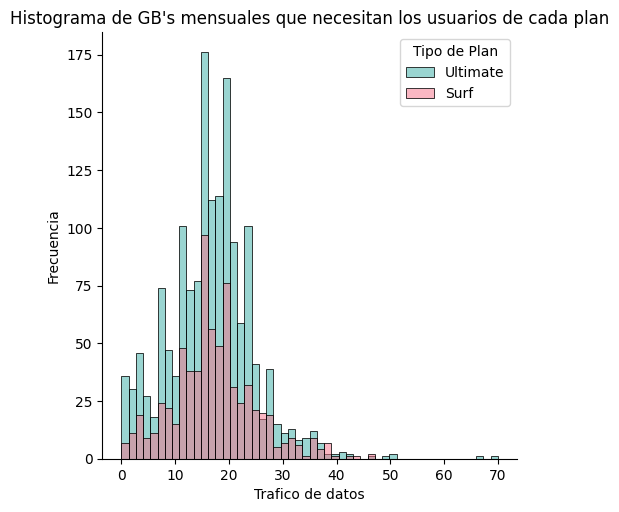

In [55]:
mega_gb_hist = megaline_2018[['plan','month','gb_used']]
sns.displot(data = mega_gb_hist,x = 'gb_used',kind = 'hist',hue = 'plan',palette = 'husl',legend = False)
plt.title("Histograma de GB's mensuales que necesitan los usuarios de cada plan")
plt.xlabel('Trafico de datos')
plt.ylabel('Frecuencia')
plt.legend(title ='Tipo de Plan',loc='upper right',labels=['Ultimate','Surf'])
plt.show()

In [56]:
print('Media del trafico de datos mesuales de los clientes')
print()
print(megaline_2018['gb_used'].mean())
print()
print('Varianza del trafico de datos de los clientes')
print()
print(np.var(megaline_2018['gb_used']))

Media del trafico de datos mesuales de los clientes

16.870475359790667

Varianza del trafico de datos de los clientes

60.75382956033922


Text(0, 0.5, 'Trafico de datos')

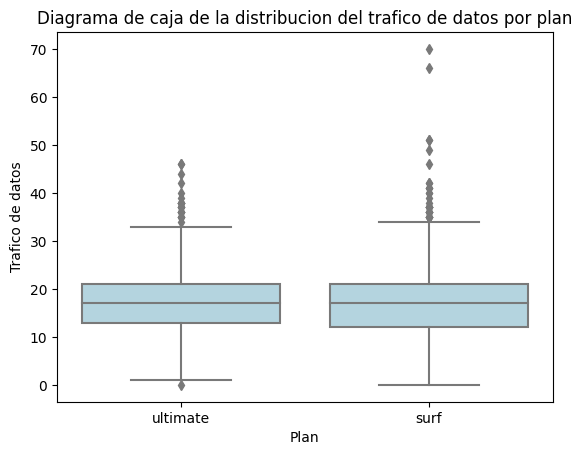

In [57]:
sns.boxplot(data=megaline_2018,x='plan',y='gb_used', color = 'lightblue')
plt.title('Diagrama de caja de la distribucion del trafico de datos por plan')
plt.xlabel('Plan')
plt.ylabel('Trafico de datos')

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b>

Se agrega por estudio estadistico
    <a class=“tocSkip”></a>
</div>

Text(0, 0.5, 'Trafico de datos')

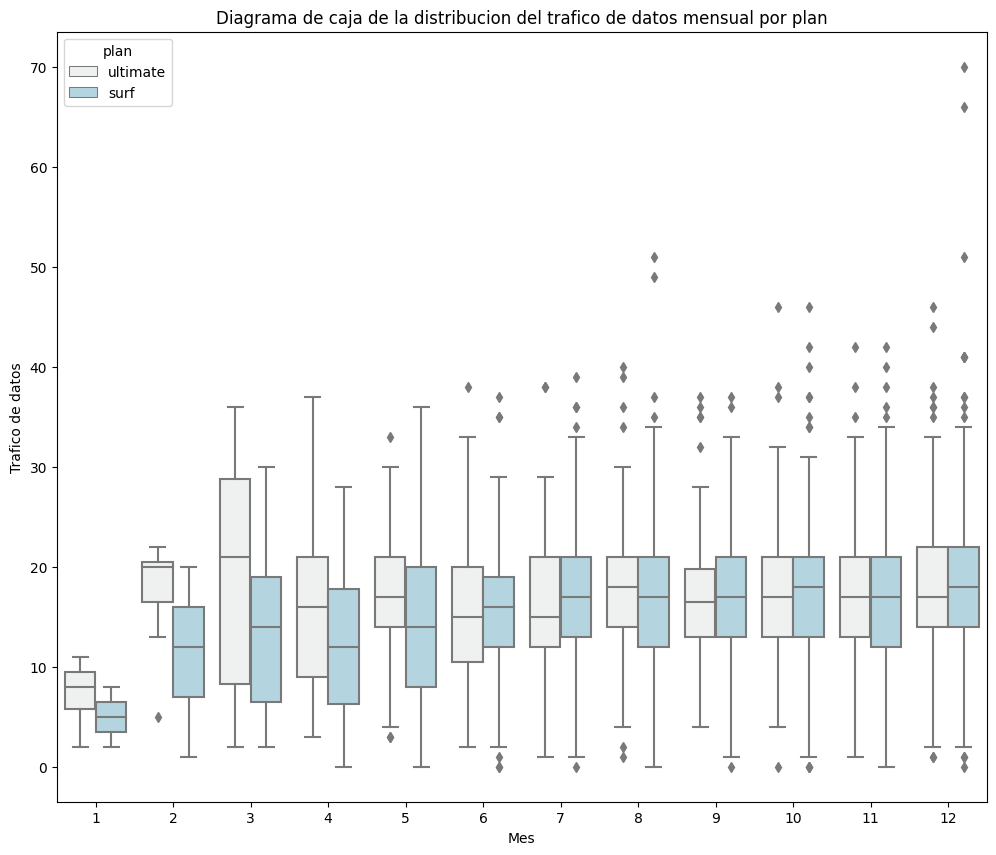

In [58]:
plt.figure(figsize=([12,10]))
sns.boxplot(data=megaline_2018,x='month',y='gb_used', color = 'lightblue',hue='plan')
plt.title('Diagrama de caja de la distribucion del trafico de datos mensual por plan')
plt.xlabel('Mes')
plt.ylabel('Trafico de datos')

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

**El trafico de datos de clientes tiene una media mensual de 20 Gb's aproximadamente en ambos planes, por ultimo existen clientes del plan surf, que se exceden ampliamente en su consumo, por lo que deberian ser contactados y ofrecer plan ultimate**

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

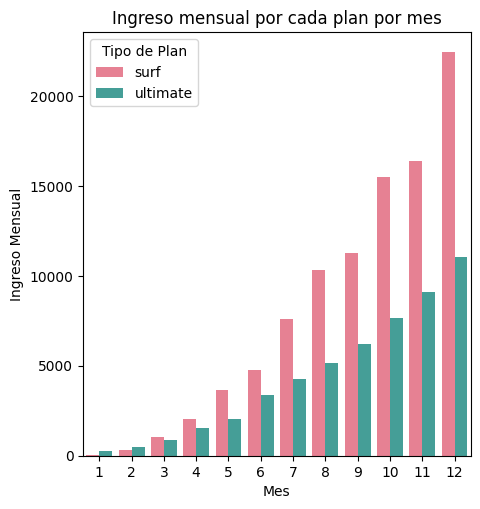

In [59]:
mega_mi_bar = megaline_2018.groupby(['plan','month'])['monthly_income'].sum().reset_index()
plt.figure(figsize=[5,5.5])
sns.barplot(data = mega_mi_bar,x = 'month',y = 'monthly_income',hue = 'plan',palette = 'husl')
plt.title('Ingreso mensual por cada plan por mes')
plt.xlabel('Mes')
plt.ylabel('Ingreso Mensual')
plt.legend(loc='upper left',title='Tipo de Plan')
plt.show()

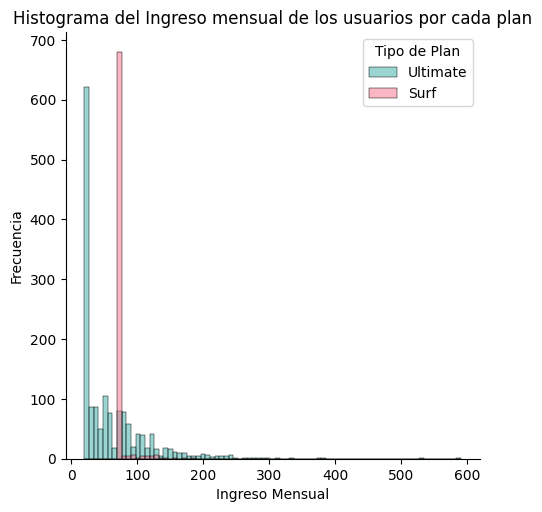

In [60]:
mega_mi_hist = megaline_2018[['plan','month','monthly_income']]
sns.displot(data = mega_mi_hist,x = 'monthly_income',kind = 'hist',hue = 'plan',palette = 'husl',legend = False)
plt.title('Histograma del Ingreso mensual de los usuarios por cada plan')
plt.xlabel('Ingreso Mensual')
plt.ylabel('Frecuencia')
plt.legend(title ='Tipo de Plan',loc='upper right',labels=['Ultimate','Surf'])
plt.show()

In [61]:
print('Media de del ingreso mensual de los clientes')
print()
print(megaline_2018['monthly_income'].mean())
print()
print('Varianza del ingreso mensual de los clientes')
print()
print(np.var(megaline_2018['monthly_income']))

Media de del ingreso mensual de los clientes

64.3511469690362

Varianza del ingreso mensual de los clientes

2172.9374746984176


Text(0, 0.5, 'Ingreso Mensual')

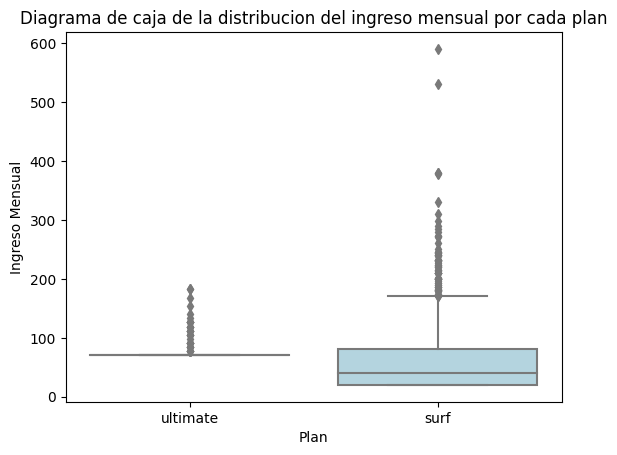

In [62]:
sns.boxplot(data=megaline_2018,x='plan',y='monthly_income', color = 'lightblue')
plt.title('Diagrama de caja de la distribucion del ingreso mensual por cada plan')
plt.xlabel('Plan')
plt.ylabel('Ingreso Mensual')

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b>

Se agrega por estudio estadistico
    <a class=“tocSkip”></a>
</div>

Text(0, 0.5, 'Ingreso Mensual')

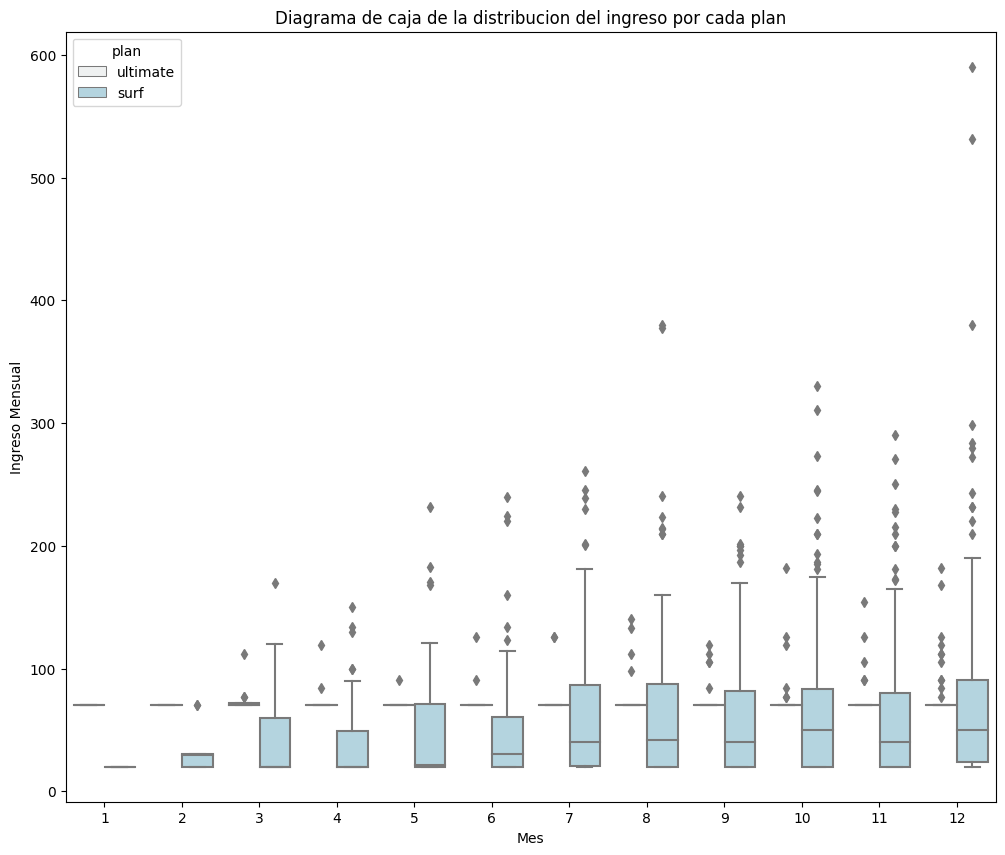

In [63]:
plt.figure(figsize=([12,10]))
sns.boxplot(data=megaline_2018,x='month',y='monthly_income', color = 'lightblue',hue='plan')
plt.title('Diagrama de caja de la distribucion del ingreso por cada plan')
plt.xlabel('Mes')
plt.ylabel('Ingreso Mensual')

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

**Segun el ingreso mensual se aprecia muy dispar por tipo de plan, los clientes del plan surf, mensualmente son los que que mas dinero aportan al ingreso de la empresa,y ademas varios que se exceden ampliamente en su consumo, por lo que deberian ser contactados y ofrecer plan ultimate**

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Lo hiciste muy bien en esta sección, escogiste colores con buen contraste y así la visualización permite una comparación más clara
   
</div>

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [64]:
# Prueba las hipótesis

print('Formulación de Prueba de Hipotesis')
print()
print('H0: Los ingresos promedios procedentes de los usuarios de los planes son iguales')
print('H1: Los ingresos promedios procedentes de los usuarios de los planes son diferentes')

ultimate = megaline_2018[megaline_2018['plan']=='ultimate']['monthly_income']
surf = megaline_2018[megaline_2018['plan']=='surf']['monthly_income']
print()
print('Nivel de significancia = 1%')
print()

resultado = st.ttest_ind(ultimate, surf)
print(f'El valor de p_value es: {resultado.pvalue}')
print()
print('Conclusión')
print('Como el pvalue es menor al nivel de significancia de la prueba, se rechaza la hipotesis nula, ya que hay evidencia estadistica, con un nivel de confianza del 99%, que los ingresos promedios de los planes son significativamente diferentes')

Formulación de Prueba de Hipotesis

H0: Los ingresos promedios procedentes de los usuarios de los planes son iguales
H1: Los ingresos promedios procedentes de los usuarios de los planes son diferentes

Nivel de significancia = 1%

El valor de p_value es: 2.862674510698644e-08

Conclusión
Como el pvalue es menor al nivel de significancia de la prueba, se rechaza la hipotesis nula, ya que hay evidencia estadistica, con un nivel de confianza del 99%, que los ingresos promedios de los planes son significativamente diferentes


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [65]:
# Prueba las hipótesis

print('Formulación de Prueba de Hipotesis')
print()
print('H0: Los ingresos promedios procedentes de los usuarios del area NY-NJ son iguales al resto de los usuarios')
print('H1: Los ingresos promedios procedentes de los usuarios del area NY-NJ son diferentes al resto de los usuarios')

mega_nynj = megaline_2018[megaline_2018['state'].str.contains('NY-NJ',case=False,regex=True)]['monthly_income']
mega_other_region = megaline_2018[~megaline_2018['state'].str.contains('NY-NJ',case=False,regex=True)]['monthly_income']

print()
print('Nivel de significancia = 1%')
print()

resultado2 = st.ttest_ind(mega_nynj, mega_other_region)
print(f'El valor de p_value es: {resultado2.pvalue}')
print()
print('Conclusión')
print('Como el pvalue es mayor al nivel de significancia de la prueba, no se rechaza la hipotesis nula, ya que no hay evidencia estadistica, con un nivel de confianza del 99%, que los ingresos promedios de los usuarios del area de NY-NJ son significativamente diferentes al resto de los usuarios')


Formulación de Prueba de Hipotesis

H0: Los ingresos promedios procedentes de los usuarios del area NY-NJ son iguales al resto de los usuarios
H1: Los ingresos promedios procedentes de los usuarios del area NY-NJ son diferentes al resto de los usuarios

Nivel de significancia = 1%

El valor de p_value es: 0.043557431621342436

Conclusión
Como el pvalue es mayor al nivel de significancia de la prueba, no se rechaza la hipotesis nula, ya que no hay evidencia estadistica, con un nivel de confianza del 99%, que los ingresos promedios de los usuarios del area de NY-NJ son significativamente diferentes al resto de los usuarios


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con las pruebas de hipótesis, es común que se use 5% de nivel de significancia por lo que la segunda prueba de hipótesis también se podría considerar estadísiticamente significativa
</div>

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

En este gran proyecto, fueron varias las aristas que se abordaron y gestiones realizadas, para dar solución a las interrogantes de la empresa.

En primera instancia se recibió la descripción general del proyecto, los archivos a utilizar, resumen de su contenido, y las cuestiones a resolver en este estudio. Por ello, primeramente se obtubieron las liberias de Python para procesar y analizar los datos de la empresa, para este caso, se uso Pandas, Numpy, Scipy, Matplotlib y Seaborn.

Posteriormente, los archivos ('.csv'), fueron importados, y cargados sus datos, para un primer analisis descriptivo, mediante el metodo info() de Pandas, el cual nos entrega la siguiente información:

            - Número de Filas y número de columnas.
            - Tipo de dato de cada columna.
            - Nombres de cada columna del archivo.
            - Datos no nulos por columna (valores ausentes).
            - Resumen de los tipos de datos usados por el DataFrame
            - Memoria usada por el DataFrame
            
Para el estudio, se obtuvo informacion relevante:

- plans: Total: 2 filas y 8 columnas 
         Tipo de dato: Object(string), numeros enteros y flotantes (decimales)
         Valores ausentes: N/A

- users: Total: 500 filas y 8 columnas 
         Tipo de dato: Object(string) y Numeros enteros
         Valores ausentes: N/A

- calls: Total: 137735 filas y 4 columnas 
         Tipo de dato: Object(string), numeros enteros y flotantes (decimales)
         Valores ausentes: N/A

- messages: Total: 76051 filas y 3 columnas 
            Tipo de dato: Object(string) y Numeros enteros
            Valores ausentes: N/A

- internet: Total: 104825 filas y 4 columnas 
            Tipo de dato: Object(string), numeros enteros y flotantes (decimales)
            Valores ausentes: N/A
                  
Luego,con la información anterior, se gestiono la corrección de los datos erroneos y se aplicaron algunos conceptos de 'Feature Engineering', lo cual permite, a partir de los datos ya generados, agregar otras variables que clarifican y simplifican el analisis, para lo cual se agregaron las siguientes variables:

- plans
Proceso: Se agrega variable gb_per_month_included, la cual indica la cantidad de Gb's incluidos en el plan contratado.

- users
Proceso: Se modifican los tipos de datos erroneos (object a datetime) de 2 columnas, y se obtienen variables de dia mes y años respectivamente, ademas se genera columna categorica 'age_range', a partir de la columna 'age', para lo cuales se eligieron 3 grupo hetarios de 18 a 25, 'young', de 25 a 50, 'adult, y sobre 50 hasta los 75 años, 'senior', por ultimo la columna city, fue separada en 2 variables cities y state, para obtener mayor orden al ver los datos. 

- calls
Proceso: Se modifican los tipos de datos erroneos (object a datetime) de 2 columnas, y se obtienen variables de dia mes y años respectivamente

- messages 
Proceso: Se modifican los tipos de datos erroneos (object a datetime) de 2 columnas, y se obtienen variables de dia mes y años respectivamente

- internet
Proceso: Se modifican los tipos de datos erroneos (object a datetime) de 2 columnas, y se obtienen variables de dia mes y años respectivamente


Luego, se analizaron las interrogantes de la empresa, que abordaban 4 variables: llamadas, mensajes, internet y el ingreso mensual. A continuacion se presentan los analisis de cada una de las variables.

- Llamadas: 1. Clientes con mucho sobreconsumo mensual, sobretodo clientes de plan surf
            2. Gran cantidad de clientes sin usar el servicio de llamadas en el mes
            3. Plan surf, oferta no alcanza a cubrir la media en llamadas de los clientes
            4. Contactar clientes para ofrecer plan ultimate

- Mensajes: 1. Clientes con mucho sobreconsumo mensual, sobretodo clientes de plan surf
            2. Gran cantidad de clientes sin usar el servicio de mensajeria incluido de su plan
            3. 
            4. Contactar clientes para ofrecer plan ultimate
            
- Internet: 1. Clientes con mucho sobreconsumo mensual, sobretodo clientes de plan surf
            2. Es el servicio mas usado por los clientes
            3. Contactar clientes para ofrecer plan ultimate
               
- Ingreso Mensual: 1. EL ingreso mensual es muy diferente por tipo de plan
                   2. Los clientes del plan surf son los que mas dinero aportan al ingreso mensual
                   3. Clientes con mucho sobreconsumo mensual, sobretodo clientes de plan surf
                   4. Contactar clientes para ofrecer plan ultimate
                   
Por ultimo, se realizaron 2 pruebas de hipotesis, donde se estudió lo siguiente:

- Prueba 1
    H0: Los ingresos promedios procedentes de los usuarios de los planes son iguales
    H1: Los ingresos promedios procedentes de los usuarios de los planes son diferentes

    Nivel de significancia = 1%

    El valor de p_value es: 2.862674510698644e-08

    Resolución
        
    Como el pvalue es menor al nivel de significancia de la prueba, se rechaza la hipotesis nula, ya que hay
    evidencia estadistica, con un nivel de confianza del 99%, que los ingresos promedios de los planes son    
    significativamente diferentes

- Prueba 2
    H0: Los ingresos promedios procedentes de los usuarios del area NY-NJ son iguales al resto de los usuarios
    H1: Los ingresos promedios procedentes de los usuarios del area NY-NJ son diferentes al resto de los usuarios

    Nivel de significancia = 1%

    El valor de p_value es: 0.043557431621342436

    Resolución
    
    Como el pvalue es mayor al nivel de significancia de la prueba, no se rechaza la hipotesis nula, ya que no hay
    evidencia estadistica, con un nivel de confianza del 99%, que los ingresos promedios de los usuarios del area de
    NY-NJ son significativamente diferentes al resto de los usuarios

**Resumen**

Es un gran proyecto, donde se pudieron analizar los servicios de la empresa, a travez de sus 2 grandes ofertas planes, el comportamiento de los clientes a travez del años y como utilizan cada servicio, siendo el de internet el mas constante, ya que por el avance de la tecnologia las llamadas y los mensajes, se generan  mediante el trafico de datos, lo que explica la gran cantidad de clientes que no utilizan los servicios de llamada y/o mensajeria de su plan.

Por ultimo, este informe puede dar pie para realizar rediseño de la oferta que se le entrega a los clientes, ya que hay muchos clientes con sobreconsumo en ambos planes.

<div class="alert alert-block alert-info">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>
    

Vas por un buen camino Javier! Hay ciertos puntos donde hay oportunidad de mejora, te he dejado mis comentarios con algunas recomendaciones para tu próxima iteracion.
<br>
<br>
Han sido pocos los puntos que he identificado pero son necesarios para que tu análisis esté completo. Pero has hecho un buen trabajo hasta este punto, te recomiendo ir describiendo un poco más lo que vas interpretando en las visualizaciones que vas presentando un pequeño comentario debajo de cada una antes de tu conclusión final para esa sección ayuda a entender mejor tu proceso de análisis.
<br>
Te felicito por las visualizaciones realizadas ya que usaste colores que facilitan la comparación de los dos planes y realizaste una muy buena conclusión de tu análisis. Cómo han sido pocos los puntos donde puede haber un cambio que son referentes a ordenar un poco el notebook estoy seguro que tendrás tu proyecto en tu siguiente iteración.
<br>
Un saludo! 🦾
</div>